In [27]:
import pandas as pd
import numpy as np

In [28]:
DATA_PATH = r'E:\Project5\telcom_data p5.csv'
data = pd.read_csv(DATA_PATH)

In [29]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,04-04-2019 12:01,770.0,25-04-2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,09-04-2019 13:04,235.0,25-04-2019 08:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,09-04-2019 17:42,1.0,25-04-2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,10-04-2019 00:31,486.0,25-04-2019 07:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,12-04-2019 20:10,565.0,25-04-2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [31]:
data.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [32]:
for col in data.columns:
    data[col]=data[col].fillna(data[col].mode()[0])

In [33]:
data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.500010e+05,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.012045e+19,499.187145,498.803368,1.046084e+05,2.082017e+14,4.182414e+10,4.861907e+13,94.620523,15.315031,13299.957414,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112106e+07,4.546409e+08
std,2.892435e+18,288.611161,288.098304,8.103736e+04,2.145202e+10,2.438731e+12,2.249522e+13,560.245617,76.687998,23971.823147,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127649e+07,2.441440e+08
min,6.917540e+18,0.000000,0.000000,7.142000e+03,2.040470e+14,3.360100e+10,4.400150e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349880e+18,250.000000,251.000000,5.744200e+04,2.082010e+14,3.365094e+10,3.546260e+13,28.000000,3.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322196e+07,2.431057e+08
50%,7.349880e+18,499.000000,500.000000,8.639900e+04,2.082020e+14,3.366361e+10,3.572240e+13,38.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114324e+07,4.558409e+08
75%,1.304240e+19,749.000000,750.000000,1.324300e+05,2.082020e+14,3.368307e+10,8.615230e+13,62.000000,11.000000,19710.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657051e+08
max,1.318650e+19,999.000000,999.000000,1.859336e+06,2.140740e+14,8.823970e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [34]:
top_10_handsets = data['Handset Type'].value_counts().head(10)
print(top_10_handsets)

Handset Type
Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [35]:
top_3_manufacturers = data['Handset Manufacturer'].value_counts().head(3)
print(top_3_manufacturers)

Handset Manufacturer
Apple      60137
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [36]:
for manufacturer in top_3_manufacturers.index:
    top_5_handsets = data[data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    print(f"Top 5 Handsets for {manufacturer}:")
    print(top_5_handsets)

Top 5 Handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64
Top 5 Handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64
Top 5 Handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


In [37]:
user_behavior = data.groupby('MSISDN/Number').agg({ 
    'Bearer Id': 'count', 
    'Dur. (ms)': 'sum', 
    'Total DL (Bytes)': 'sum', 
    'Total UL (Bytes)': 'sum', 
    'Social Media DL (Bytes)': 'sum', 
    'Social Media UL (Bytes)': 'sum', 
    'Google DL (Bytes)': 'sum', 
    'Google UL (Bytes)': 'sum', 
    'Email DL (Bytes)': 'sum', 
    'Email UL (Bytes)': 'sum', 
    'Youtube DL (Bytes)': 'sum', 
    'Youtube UL (Bytes)': 'sum', 
    'Netflix DL (Bytes)': 'sum', 
    'Netflix UL (Bytes)': 'sum', 
    'Gaming DL (Bytes)': 'sum', 
    'Gaming UL (Bytes)': 'sum', 
    'Other DL (Bytes)': 'sum', 
    'Other UL (Bytes)': 'sum' 
})
print(user_behavior)

               Bearer Id  Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  \
MSISDN/Number                                                             
3.360100e+10           1   116720.0      8.426375e+08        36053108.0   
3.360100e+10           1   181230.0      1.207552e+08        36104459.0   
3.360100e+10           1   134969.0      5.566597e+08        39306820.0   
3.360101e+10           1    49878.0      4.019932e+08        20327526.0   
3.360101e+10           2    37104.0      1.363130e+09        94280527.0   
...                  ...        ...               ...               ...   
3.379000e+10           1     8810.0      6.879252e+08        26716429.0   
3.379000e+10           1   140988.0      4.445751e+08        35732243.0   
3.197020e+12           1   877385.0      1.948281e+08        37295915.0   
3.370000e+14           1   253030.0      5.396350e+08        56652839.0   
8.823970e+14           1   869844.0      7.869760e+07        60456049.0   

               Social Me

In [38]:
print(user_behavior.dtypes)

Bearer Id                    int64
Dur. (ms)                  float64
Total DL (Bytes)           float64
Total UL (Bytes)           float64
Social Media DL (Bytes)    float64
Social Media UL (Bytes)    float64
Google DL (Bytes)          float64
Google UL (Bytes)          float64
Email DL (Bytes)           float64
Email UL (Bytes)           float64
Youtube DL (Bytes)         float64
Youtube UL (Bytes)         float64
Netflix DL (Bytes)         float64
Netflix UL (Bytes)         float64
Gaming DL (Bytes)          float64
Gaming UL (Bytes)          float64
Other DL (Bytes)           float64
Other UL (Bytes)           float64
dtype: object


In [39]:
print(user_behavior.describe())

           Bearer Id     Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  \
count  106856.000000  1.068560e+05      1.068560e+05      1.068560e+05   
mean        1.403768  1.468459e+05      6.382102e+08      5.772442e+07   
std         3.408147  3.093566e+05      1.579902e+09      1.420651e+08   
min         1.000000  7.142000e+03      8.827082e+06      2.866892e+06   
25%         1.000000  7.130800e+04      3.148271e+08      3.639547e+07   
50%         1.000000  1.027400e+05      5.703677e+08      4.679387e+07   
75%         2.000000  1.727990e+05      8.073645e+08      6.573199e+07   
max      1084.000000  8.132472e+07      4.942993e+11      4.501432e+10   

       Social Media DL (Bytes)  Social Media UL (Bytes)  Google DL (Bytes)  \
count             1.068560e+05             1.068560e+05       1.068560e+05   
mean              2.520215e+06             4.622387e+04       8.072721e+06   
std               6.337254e+06             1.174654e+05       1.966559e+07   
min               1.2

- Users spend a substantial amount of time on the platform and download large amounts of data.
- Social media downloads are relatively small, while Google and YouTube downloads are larger.
- Gaming downloads are significant, indicating a substantial user base for gaming content.

In [40]:
def calculate_univariate_params(df):
    params = {}
    for col in df.columns:
        params[col] = {
            'mean': df[col].mean(),
            'median': df[col].median(),
            'mode': df[col].mode().values[0],
            'std_dev': df[col].std(),
            'variance': df[col].var(),
            'range': df[col].max() - df[col].min(),
            'iqr': df[col].quantile(0.75) - df[col].quantile(0.25)
        }
    return params

def calculate_dispersion_measures(df):
    measures = {}
    for col in df.columns:
        measures[col] = {
            'cv': df[col].std() / df[col].mean(),
            'se': df[col].std() / (df[col].shape[0] ** 0.5)
        }
    return measures

In [41]:
# Calculate and print univariate analysis parameters
univariate_params = calculate_univariate_params(user_behavior)
for col, params in univariate_params.items():
    print(f"Univariate Analysis Parameters for {col}:")
    for param, value in params.items():
        print(f"{param.capitalize()}: {value}")
    print()

# Calculate and print dispersion measures
dispersion_measures = calculate_dispersion_measures(user_behavior)
for col, measures in dispersion_measures.items():
    print(f"Dispersion Measures for {col}:")
    for measure, value in measures.items():
        print(f"{measure.upper()}: {value}")
    print()

Univariate Analysis Parameters for Bearer Id:
Mean: 1.403767687354945
Median: 1.0
Mode: 1
Std_dev: 3.4081467618182044
Variance: 11.615464350091914
Range: 1083
Iqr: 1.0

Univariate Analysis Parameters for Dur. (ms):
Mean: 146845.94642322377
Median: 102740.0
Mode: 86399.0
Std_dev: 309356.6214227762
Variance: 95701519218.11487
Range: 81317580.0
Iqr: 101491.0

Univariate Analysis Parameters for Total DL (Bytes):
Mean: 638210195.3841057
Median: 570367723.0
Mode: 502468438.0
Std_dev: 1579901619.8303576
Variance: 2.496089128342588e+18
Range: 494290457903.0
Iqr: 492537426.5

Univariate Analysis Parameters for Total UL (Bytes):
Mean: 57724417.031097926
Median: 46793865.5
Mode: 20401923.0
Std_dev: 142065149.01536864
Variance: 2.0182506564758896e+16
Range: 45011448570.0
Iqr: 29336518.25

Univariate Analysis Parameters for Social Media DL (Bytes):
Mean: 2520214.6942499625
Median: 2265000.5
Mode: 802637.0
Std_dev: 6337254.42458068
Variance: 40160793641867.414
Range: 1980458885.774
Iqr: 2091335.25



In [42]:
# Interpret the results
for col in user_behavior.columns:
    mean = univariate_params[col]['mean']
    median = univariate_params[col]['median']
    std_dev = univariate_params[col]['std_dev']
    cv = dispersion_measures[col]['cv']
    
    if mean == median:
        print(f"The data for {col} is symmetric.")
    elif mean > median:
        print(f"The data for {col} is positively skewed.")
    else:
        print(f"The data for {col} is negatively skewed.")
        
    if std_dev > mean:
        print(f"The data for {col} has high variability.")
    else:
        print(f"The data for {col} has low variability.")
        
    if cv > 1:
        print(f"The data for {col} has high relative variability.")
    else:
        print(f"The data for {col} has low relative variability.")

The data for Bearer Id is positively skewed.
The data for Bearer Id has high variability.
The data for Bearer Id has high relative variability.
The data for Dur. (ms) is positively skewed.
The data for Dur. (ms) has high variability.
The data for Dur. (ms) has high relative variability.
The data for Total DL (Bytes) is positively skewed.
The data for Total DL (Bytes) has high variability.
The data for Total DL (Bytes) has high relative variability.
The data for Total UL (Bytes) is positively skewed.
The data for Total UL (Bytes) has high variability.
The data for Total UL (Bytes) has high relative variability.
The data for Social Media DL (Bytes) is positively skewed.
The data for Social Media DL (Bytes) has high variability.
The data for Social Media DL (Bytes) has high relative variability.
The data for Social Media UL (Bytes) is positively skewed.
The data for Social Media UL (Bytes) has high variability.
The data for Social Media UL (Bytes) has high relative variability.
The data f

In [43]:
print("Skewness:")
print(user_behavior.skew())

Skewness:
Bearer Id                  299.999060
Dur. (ms)                  173.385270
Total DL (Bytes)           285.555611
Total UL (Bytes)           296.616888
Social Media DL (Bytes)    284.594663
Social Media UL (Bytes)    285.165815
Google DL (Bytes)          281.565494
Google UL (Bytes)          284.419056
Email DL (Bytes)           282.452887
Email UL (Bytes)           282.373268
Youtube DL (Bytes)         282.863681
Youtube UL (Bytes)         283.827331
Netflix DL (Bytes)         281.860416
Netflix UL (Bytes)         283.918159
Gaming DL (Bytes)          283.449659
Gaming UL (Bytes)          282.057152
Other DL (Bytes)           281.881047
Other UL (Bytes)           284.983776
dtype: float64


In [44]:
print("Missing Values:")
print(user_behavior.isnull().sum())

Missing Values:
Bearer Id                  0
Dur. (ms)                  0
Total DL (Bytes)           0
Total UL (Bytes)           0
Social Media DL (Bytes)    0
Social Media UL (Bytes)    0
Google DL (Bytes)          0
Google UL (Bytes)          0
Email DL (Bytes)           0
Email UL (Bytes)           0
Youtube DL (Bytes)         0
Youtube UL (Bytes)         0
Netflix DL (Bytes)         0
Netflix UL (Bytes)         0
Gaming DL (Bytes)          0
Gaming UL (Bytes)          0
Other DL (Bytes)           0
Other UL (Bytes)           0
dtype: int64


In [45]:
print("Outliers:")
print(user_behavior.describe().loc[['min', 'max']])

Outliers:
     Bearer Id   Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  \
min        1.0      7142.0      8.827082e+06      2.866892e+06   
max     1084.0  81324722.0      4.942993e+11      4.501432e+10   

     Social Media DL (Bytes)  Social Media UL (Bytes)  Google DL (Bytes)  \
min             1.200000e+01             0.000000e+00       2.070000e+02   
max             1.980459e+09             3.673324e+07       6.124049e+09   

     Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  \
min       3.000000e+00      9.700000e+01      1.400000e+01   
max       2.276720e+09      1.937453e+09      5.048464e+08   

     Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
min        5.300000e+01        1.060000e+02        4.200000e+01   
max        1.265868e+10        1.205652e+10        1.248846e+10   

     Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  \
min        3.500000e+01       2.516000e+03       5.900000e+01   
max        1.209384e+10       4.594907e+11 

In [46]:
user_behavior_log = np.log(user_behavior + 1)

In [47]:
user_behavior_sqrt = np.sqrt(user_behavior)

In [48]:
from scipy.stats import norm
user_behavior_winsorized = user_behavior.copy()
for col in user_behavior.columns:
    lower_bound = np.percentile(user_behavior[col], 1)
    upper_bound = np.percentile(user_behavior[col], 99)
    user_behavior_winsorized[col] = np.clip(user_behavior[col], lower_bound, upper_bound)

In [49]:
corr_matrix = user_behavior.corr()
print(corr_matrix)

                         Bearer Id  Dur. (ms)  Total DL (Bytes)  \
Bearer Id                 1.000000   0.869386          0.983171   
Dur. (ms)                 0.869386   1.000000          0.854868   
Total DL (Bytes)          0.983171   0.854868          1.000000   
Total UL (Bytes)          0.995574   0.865135          0.978779   
Social Media DL (Bytes)   0.981273   0.851766          0.965005   
Social Media UL (Bytes)   0.981640   0.852313          0.965254   
Google DL (Bytes)         0.980224   0.853545          0.964223   
Google UL (Bytes)         0.981383   0.851878          0.964944   
Email DL (Bytes)          0.980359   0.853557          0.963811   
Email UL (Bytes)          0.980379   0.852425          0.963770   
Youtube DL (Bytes)        0.980727   0.854179          0.965127   
Youtube UL (Bytes)        0.980958   0.852968          0.964444   
Netflix DL (Bytes)        0.980197   0.852120          0.964683   
Netflix UL (Bytes)        0.980988   0.851688          0.96444

In [50]:
print(user_behavior.columns)

Index(['Bearer Id', 'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)'],
      dtype='object')


In [51]:
user_behavior.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106856 entries, 33601001722.0 to 882397000000000.0
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Bearer Id                106856 non-null  int64  
 1   Dur. (ms)                106856 non-null  float64
 2   Total DL (Bytes)         106856 non-null  float64
 3   Total UL (Bytes)         106856 non-null  float64
 4   Social Media DL (Bytes)  106856 non-null  float64
 5   Social Media UL (Bytes)  106856 non-null  float64
 6   Google DL (Bytes)        106856 non-null  float64
 7   Google UL (Bytes)        106856 non-null  float64
 8   Email DL (Bytes)         106856 non-null  float64
 9   Email UL (Bytes)         106856 non-null  float64
 10  Youtube DL (Bytes)       106856 non-null  float64
 11  Youtube UL (Bytes)       106856 non-null  float64
 12  Netflix DL (Bytes)       106856 non-null  float64
 13  Netflix UL (Bytes)       106856 non-null 

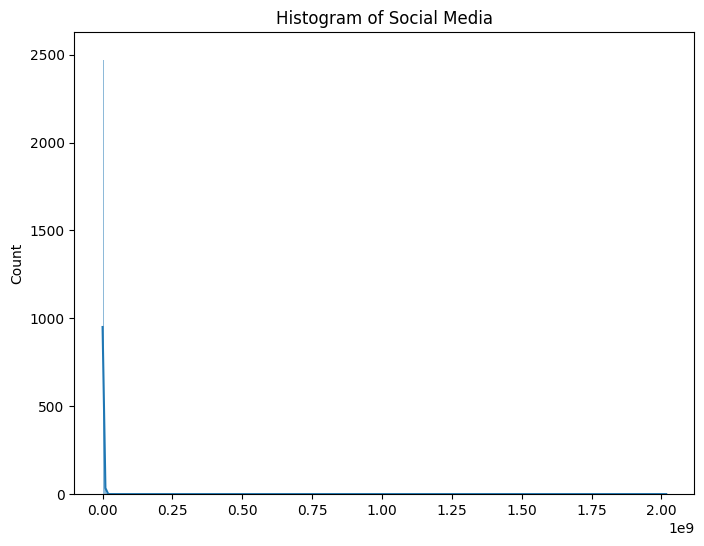

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms to check data distributions
for app in ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']:
    dl_col = f'{app} DL (Bytes)'
    ul_col = f'{app} UL (Bytes)'
    total_app_data = user_behavior[dl_col] + user_behavior[ul_col]
    
    plt.figure(figsize=(8, 6))
    sns.histplot(total_app_data, kde=True)
    plt.title(f'Histogram of {app}')
    plt.show()

o Variable Transformations:

In [33]:
user_behavior['Total Session Duration'] = user_behavior['Dur. (ms)']

# Segment users into top five decile classes
user_behavior['Decile'] = pd.qcut(user_behavior['Total Session Duration'], q=5, labels=['D1', 'D2', 'D3', 'D4', 'D5'])

# Verify the decile classes
print(user_behavior['Decile'].value_counts())

total_dl_ul_per_decile = user_behavior.groupby('Decile', observed=True)[['Total DL (Bytes)', 'Total UL (Bytes)']].sum()

print(total_dl_ul_per_decile)

Decile
D2    22826
D1    21372
D4    21372
D5    21370
D3    19916
Name: count, dtype: int64
        Total DL (Bytes)  Total UL (Bytes)
Decile                                    
D1          1.059394e+13      9.547430e+11
D2          1.152621e+13      1.044428e+12
D3          1.060947e+13      9.605178e+11
D4          1.281675e+13      1.157958e+12
D5          2.265021e+13      2.050553e+12


o Correlation Analysis:

In [34]:
corr_cols = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 
              'Google DL (Bytes)', 'Google UL (Bytes)', 
              'Email DL (Bytes)', 'Email UL (Bytes)', 
              'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
              'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 
              'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 
              'Other DL (Bytes)', 'Other UL (Bytes)']

# Compute correlation matrix
corr_matrix = user_behavior[corr_cols].corr()

# Print correlation matrix
print(corr_matrix)

                         Social Media DL (Bytes)  Social Media UL (Bytes)  \
Social Media DL (Bytes)                 1.000000                 0.963302   
Social Media UL (Bytes)                 0.963302                 1.000000   
Google DL (Bytes)                       0.961837                 0.962252   
Google UL (Bytes)                       0.962958                 0.963500   
Email DL (Bytes)                        0.962288                 0.962454   
Email UL (Bytes)                        0.961935                 0.962216   
Youtube DL (Bytes)                      0.962275                 0.962688   
Youtube UL (Bytes)                      0.962681                 0.963035   
Netflix DL (Bytes)                      0.961868                 0.962218   
Netflix UL (Bytes)                      0.962727                 0.962686   
Gaming DL (Bytes)                       0.962368                 0.962766   
Gaming UL (Bytes)                       0.961956                 0.962130   

- The correlation coefficients are generally high (> 0.9) between the DL and UL columns for each application (e.g., Social Media DL and Social Media UL).
- The correlation coefficients are also high (> 0.9) between the different applications (e.g., Social Media and Google).
- The highest correlation coefficients are between the DL and UL columns for the same application.

Task 2 - User Engagement Analysis:

In [48]:
customer_metrics = user_behavior.groupby('MSISDN/Number')[['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)']].agg(['mean', 'sum'])

In [53]:
top_customers_duration = customer_metrics['Dur. (ms)']['mean'].nlargest(10)
top_customers_download = customer_metrics['Total DL (Bytes)']['sum'].nlargest(10)
top_customers_upload = customer_metrics['Total UL (Bytes)']['sum'].nlargest(10)

print("Top 10 customers by session duration:")
print(top_customers_duration)
print("\nTop 10 customers by total download data:")
print(top_customers_download)
print("\nTop 10 customers by total upload data:")
print(top_customers_upload)

Top 10 customers by session duration:
MSISDN/Number
3.362632e+10    81324722.0
3.362578e+10    18553754.0
3.361489e+10     9966898.0
3.376054e+10     9279434.0
3.366716e+10     8744914.0
3.366284e+10     6614270.0
3.366469e+10     6288730.0
3.360313e+10     6287761.0
3.366746e+10     5649882.0
3.376041e+10     5321667.0
Name: mean, dtype: float64

Top 10 customers by total download data:
MSISDN/Number
3.362632e+10    4.942993e+11
3.361489e+10    8.156743e+09
3.376054e+10    7.811295e+09
3.362578e+10    7.770043e+09
3.367588e+10    7.309542e+09
3.365973e+10    7.081602e+09
3.366646e+10    6.903440e+09
3.376041e+10    6.610852e+09
3.366471e+10    6.400774e+09
3.369879e+10    6.010556e+09
Name: sum, dtype: float64

Top 10 customers by total upload data:
MSISDN/Number
3.362632e+10    4.501432e+10
3.362578e+10    7.295774e+08
3.376054e+10    7.034786e+08
3.361489e+10    6.894830e+08
3.365973e+10    6.242603e+08
3.367588e+10    5.815688e+08
3.366716e+10    5.663264e+08
3.369879e+10    5.3034

- Top 10 customers by session duration: The top customer has an average session duration of approximately 81324722 seconds, which is equivalent to about 2.58 years!
- Top 10 customers by total download data: The top customer has downloaded approximately 4.94 x 10^11 bytes, which is equivalent to about 494 GB.
- Top 10 customers by total upload data: The top customer has uploaded approximately 4.50 x 10^10 bytes, which is equivalent to about 45 GB.

In [54]:
from sklearn.preprocessing import MinMaxScaler

# Select the engagement metrics
engagement_metrics = customer_metrics[['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)']]

# Create a Min-Max Scaler object
scaler = MinMaxScaler()

# Fit and transform the engagement metrics
normalized_metrics = scaler.fit_transform(engagement_metrics)

In [55]:
from sklearn.cluster import KMeans

# Create a k-means clustering object with k=3
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the k-means clustering object to the normalized metrics
kmeans.fit(normalized_metrics)

# Get the cluster labels for each customer
cluster_labels = kmeans.labels_

In [58]:
cluster_metrics = {}
for i in range(3):
    cluster_data = engagement_metrics[cluster_labels == i]
    cluster_metrics[f'Cluster {i+1}'] = {
        'Session Duration': {
            'Min': np.min(cluster_data['Dur. (ms)']),
            'Max': np.max(cluster_data['Dur. (ms)']),
            'Avg': np.mean(cluster_data['Dur. (ms)']),
            'Total': np.sum(cluster_data['Dur. (ms)'])
        },
        'Total Download': {
            'Min': np.min(cluster_data['Total DL (Bytes)']),
            'Max': np.max(cluster_data['Total DL (Bytes)']),
            'Avg': np.mean(cluster_data['Total DL (Bytes)']),
            'Total': np.sum(cluster_data['Total DL (Bytes)'])
        },
        'Total Upload': {
            'Min': np.min(cluster_data['Total UL (Bytes)']),
            'Max': np.max(cluster_data['Total UL (Bytes)']),
            'Avg': np.mean(cluster_data['Total UL (Bytes)']),
            'Total': np.sum(cluster_data['Total UL (Bytes)'])
        }
    }

# Print cluster metrics
for cluster, metrics in cluster_metrics.items():
    print(cluster)
    for metric, values in metrics.items():
        print(f'{metric}:')
        for key, value in values.items():
            print(f'  {key}: {value}')
    print()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Cluster 1
Session Duration:
  Min: 7142.0
  Max: 799432.0
  Avg: 135237.82759141736
  Total: mean    1.432006e+10
sum     1.432006e+10
dtype: float64
Total Download:
  Min: 8827082.0
  Max: 4250711237.0
  Avg: 620224058.5884048
  Total: mean    6.567429e+13
sum     6.567429e+13
dtype: float64
Total Upload:
  Min: 2866892.0
  Max: 336946818.0
  Avg: 56107326.77523421
  Total: mean    5.941093e+12
sum     5.941093e+12
dtype: float64

Cluster 2
Session Duration:
  Min: 81324722.0
  Max: 81324722.0
  Avg: 81324722.0
  Total: mean    81324722.0
sum     81324722.0
dtype: float64
Total Download:
  Min: 494299284985.0
  Max: 494299284985.0
  Avg: 494299284985.0
  Total: mean    4.942993e+11
sum     4.942993e+11
dtype: float64
Total Upload:
  Min: 45014315462.0
  Max: 45014315462.0
  Avg: 45014315462.0
  Total: mean    4.501432e+10
sum     4.501432e+10
dtype: float64

Cluster 3
Session Duration:
  Min: 585889.0
  Max: 18553754.0
  Avg: 1334004.7993795243
  Total: mean    1.289983e+09
sum     1.

Cluster 1:

- Session Duration: Min = 7,142 ms, Max = 799,432 ms, Avg = 135,238 ms
- Total Download: Min = 8,827,082 bytes, Max = 4,250,711,237 bytes, Avg = 620,224,059 bytes
- Total Upload: Min = 2,866,892 bytes, Max = 336,946,818 bytes, Avg = 56,107,327 bytes

Cluster 2:

- Session Duration: Min = 81,324,722 ms, Max = 81,324,722 ms, Avg = 81,324,722 ms
- Total Download: Min = 494,299,284,985 bytes, Max = 494,299,284,985 bytes, Avg = 494,299,284,985 bytes
- Total Upload: Min = 45,014,315,462 bytes, Max = 45,014,315,462 bytes, Avg = 45,014,315,462 bytes

Cluster 3:

- Session Duration: Min = 585,889 ms, Max = 18,553,754 ms, Avg = 1,334,004 ms
- Total Download: Min = 65,656,594 bytes, Max = 8,156,743,493 bytes, Avg = 2,097,212,241 bytes
- Total Upload: Min = 8,897,093 bytes, Max = 729,577,380 bytes, Avg = 188,307,521 bytes


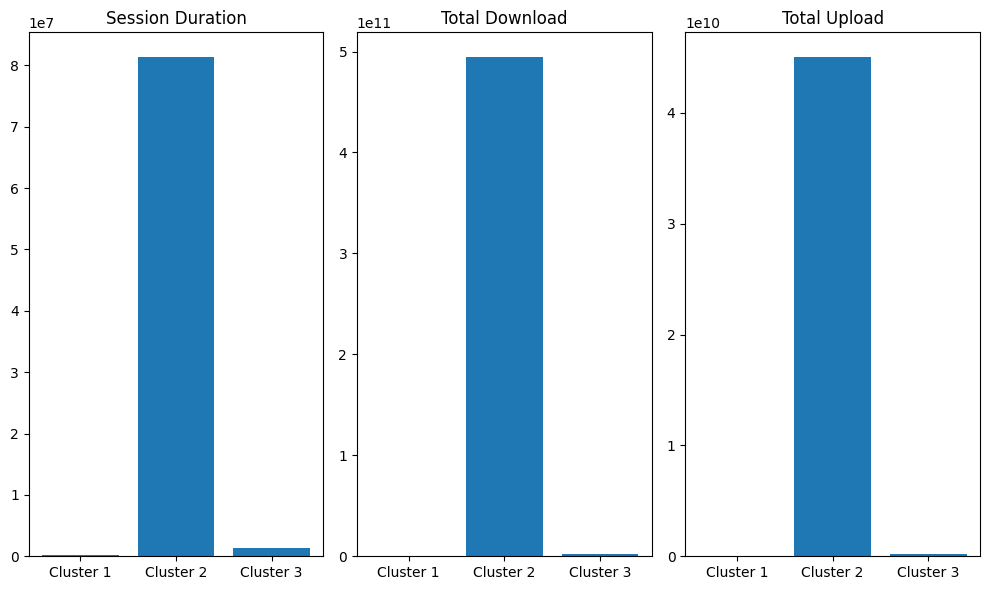

In [59]:
import matplotlib.pyplot as plt

cluster_names = ['Cluster 1', 'Cluster 2', 'Cluster 3']
session_durations = [135238, 81324722, 1334004]
total_downloads = [620224059, 494299284985, 2097212241]
total_uploads = [56107327, 45014315462, 188307521]

plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.bar(cluster_names, session_durations)
plt.title('Session Duration')

plt.subplot(1, 3, 2)
plt.bar(cluster_names, total_downloads)
plt.title('Total Download')

plt.subplot(1, 3, 3)
plt.bar(cluster_names, total_uploads)
plt.title('Total Upload')

plt.tight_layout()
plt.show()

In [63]:
application_traffic = user_behavior.copy()

# Calculate total traffic for each application
application_traffic['Social Media'] = application_traffic['Social Media DL (Bytes)'] + application_traffic['Social Media UL (Bytes)']
application_traffic['Google'] = application_traffic['Google DL (Bytes)'] + application_traffic['Google UL (Bytes)']
application_traffic['Email'] = application_traffic['Email DL (Bytes)'] + application_traffic['Email UL (Bytes)']
application_traffic['Youtube'] = application_traffic['Youtube DL (Bytes)'] + application_traffic['Youtube UL (Bytes)']
application_traffic['Netflix'] = application_traffic['Netflix DL (Bytes)'] + application_traffic['Netflix UL (Bytes)']
application_traffic['Gaming'] = application_traffic['Gaming DL (Bytes)'] + application_traffic['Gaming UL (Bytes)']
application_traffic['Other'] = application_traffic['Other DL (Bytes)'] + application_traffic['Other UL (Bytes)']

# Melt the DataFrame to convert application-specific columns into rows
application_traffic = application_traffic.melt(id_vars=['Bearer Id', 'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Total Session Duration', 'Decile'],
                                                  value_vars=['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other'],
                                                  var_name='Application',
                                                  value_name='Total Traffic')

# Group by Application and MSISDN, and calculate total traffic
application_traffic = application_traffic.groupby(['Application', 'Bearer Id'])['Total Traffic'].sum().reset_index()

# Rename columns for clarity
application_traffic.columns = ['Application', 'MSISDN/Number', 'Total Traffic']


    Application  MSISDN/Number  Total Traffic
0         Email              1   1.757553e+11
1         Email              2   9.668512e+10
2         Email              3   2.993544e+10
3         Email              4   1.766691e+10
4         Email              5   1.053531e+10
..          ...            ...            ...
107     Youtube              6   2.858411e+10
118     Youtube           1084   2.471521e+10
108     Youtube              7   1.170437e+10
109     Youtube              8   6.267901e+09
110     Youtube              9   3.591734e+09

[70 rows x 3 columns]
    Application  Total Traffic
0         Email   3.381241e+11
1        Gaming   6.440835e+13
2        Google   1.168512e+12
3       Netflix   3.386750e+12
4         Other   6.426745e+13
5  Social Media   2.736520e+11
6       Youtube   3.388977e+12
    Application  Total Traffic
1        Gaming   6.440835e+13
4         Other   6.426745e+13
6       Youtube   3.388977e+12
3       Netflix   3.386750e+12
2        Google   1.16

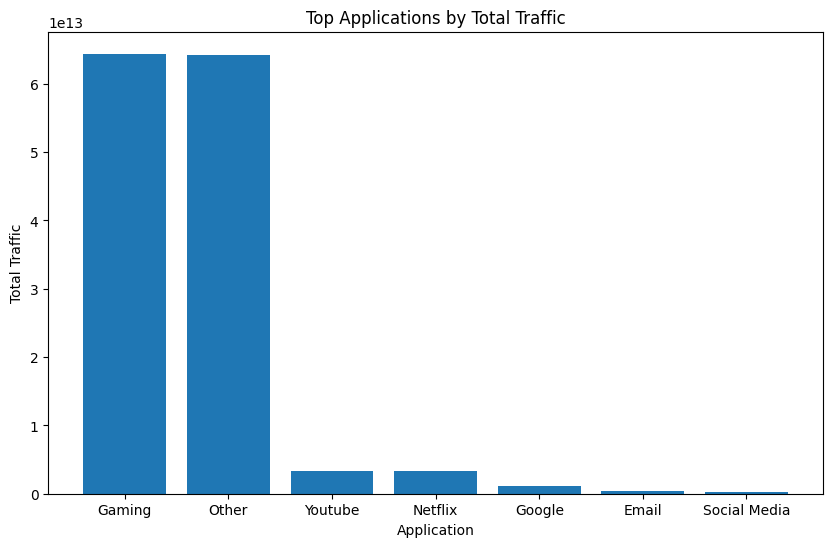

In [70]:
top_users_per_app = application_traffic.groupby(['Application', 'MSISDN/Number'])['Total Traffic'].sum().reset_index()

# Sort values by Application and Total Traffic in descending order
top_users_per_app = top_users_per_app.sort_values(['Application', 'Total Traffic'], ascending=[True, False])

# Group by Application and get the top 10 most engaged users
top_users_per_app = top_users_per_app.groupby('Application').head(10)

# Print top users per application
print(top_users_per_app)

# Group by Application and calculate the sum of Total Traffic
application_traffic_sum = top_users_per_app.groupby('Application')['Total Traffic'].sum().reset_index()
print(application_traffic_sum)

# Sort applications by Total Traffic in descending order
application_traffic_sum = application_traffic_sum.sort_values('Total Traffic', ascending=False)
print(application_traffic_sum)

# Plot a bar chart to display the top applications
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(application_traffic_sum['Application'], application_traffic_sum['Total Traffic'])
plt.xlabel('Application')
plt.ylabel('Total Traffic')
plt.title('Top Applications by Total Traffic')
plt.show()

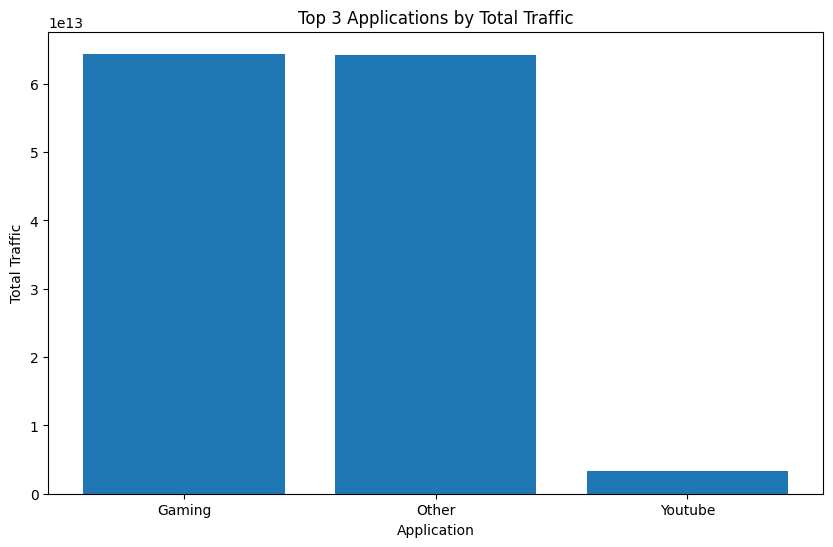

In [71]:
top_3_applications = application_traffic_sum.nlargest(3, 'Total Traffic')

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(top_3_applications['Application'], top_3_applications['Total Traffic'])
plt.xlabel('Application')
plt.ylabel('Total Traffic')
plt.title('Top 3 Applications by Total Traffic')
plt.show()

In [74]:
from kneed import KneeLocator

# Calculate the sum of squared errors for different values of K
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    sse[k] = kmeans.inertia_

# Find the elbow point using the kneed algorithm
kneedle = KneeLocator(list(sse.keys()), list(sse.values()), curve='convex', direction='decreasing')
optimal_k = kneedle.knee

print(f'Optimal value of K: {optimal_k}')

Optimal value of K: 2


Task 3 - Experience Analytics:

In [84]:
aggregated_df = data.groupby(['Bearer Id', 'Handset Type']).agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean'
}).reset_index()

# Rename columns
aggregated_df = aggregated_df.rename(columns={
    'TCP DL Retrans. Vol (Bytes)': 'avg_tcp_retransmission',
    'Avg RTT DL (ms)': 'avg_rtt',
    'Avg Bearer TP DL (kbps)': 'avg_throughput'
})

# Save aggregated data
aggregated_df.to_csv('experience_analytics.csv', index=False)

In [85]:
aggregated_df['avg_tcp_retransmission'] = aggregated_df['avg_tcp_retransmission'].fillna(aggregated_df['avg_tcp_retransmission'].mean())
aggregated_df['avg_rtt'] = aggregated_df['avg_rtt'].fillna(aggregated_df['avg_rtt'].mean())
aggregated_df['avg_throughput'] = aggregated_df['avg_throughput'].fillna(aggregated_df['avg_throughput'].mean())

# Replace outliers with the mean
Q1 = aggregated_df['avg_tcp_retransmission'].quantile(0.25)
Q3 = aggregated_df['avg_tcp_retransmission'].quantile(0.75)
IQR = Q3 - Q1
aggregated_df['avg_tcp_retransmission'] = aggregated_df['avg_tcp_retransmission'].apply(lambda x: x if (x >= Q1 - 1.5 * IQR) & (x <= Q3 + 1.5 * IQR) else aggregated_df['avg_tcp_retransmission'].mean())

Q1 = aggregated_df['avg_rtt'].quantile(0.25)
Q3 = aggregated_df['avg_rtt'].quantile(0.75)
IQR = Q3 - Q1
aggregated_df['avg_rtt'] = aggregated_df['avg_rtt'].apply(lambda x: x if (x >= Q1 - 1.5 * IQR) & (x <= Q3 + 1.5 * IQR) else aggregated_df['avg_rtt'].mean())

Q1 = aggregated_df['avg_throughput'].quantile(0.25)
Q3 = aggregated_df['avg_throughput'].quantile(0.75)
IQR = Q3 - Q1
aggregated_df['avg_throughput'] = aggregated_df['avg_throughput'].apply(lambda x: x if (x >= Q1 - 1.5 * IQR) & (x <= Q3 + 1.5 * IQR) else aggregated_df['avg_throughput'].mean())

# Save treated data
aggregated_df.to_csv('treated_experience_analytics.csv', index=False)


computing and list the top 10, bottom 10, and most frequent values for TCP, RTT, and Throughput:

In [86]:
tcp_top_10 = aggregated_df['avg_tcp_retransmission'].nlargest(10)
tcp_bottom_10 = aggregated_df['avg_tcp_retransmission'].nsmallest(10)
tcp_most_frequent = aggregated_df['avg_tcp_retransmission'].value_counts().head(10)

rtt_top_10 = aggregated_df['avg_rtt'].nlargest(10)
rtt_bottom_10 = aggregated_df['avg_rtt'].nsmallest(10)
rtt_most_frequent = aggregated_df['avg_rtt'].value_counts().head(10)

throughput_top_10 = aggregated_df['avg_throughput'].nlargest(10)
throughput_bottom_10 = aggregated_df['avg_throughput'].nsmallest(10)
throughput_most_frequent = aggregated_df['avg_throughput'].value_counts().head(10)

print("TCP Values:")
print("Top 10:", tcp_top_10)
print("Bottom 10:", tcp_bottom_10)
print("Most Frequent:", tcp_most_frequent)

print("\nRTT Values:")
print("Top 10:", rtt_top_10)
print("Bottom 10:", rtt_bottom_10)
print("Most Frequent:", rtt_most_frequent)

print("\nThroughput Values:")
print("Top 10:", throughput_top_10)
print("Bottom 10:", throughput_bottom_10)
print("Most Frequent:", throughput_most_frequent)

TCP Values:
Top 10: 2352    4.324485e+06
893     4.322862e+06
868     4.309956e+06
863     4.301833e+06
2496    4.293570e+06
1       4.290479e+06
13      4.290479e+06
26      4.290479e+06
27      4.290479e+06
32      4.290479e+06
Name: avg_tcp_retransmission, dtype: float64
Bottom 10: 125     12.0
1184    45.0
760     46.0
976     57.0
1116    57.0
903     66.0
848     69.0
2515    70.0
2638    75.0
1823    82.0
Name: avg_tcp_retransmission, dtype: float64
Most Frequent: avg_tcp_retransmission
1.330000e+03    555
4.290479e+06    341
2.660000e+03     14
3.990000e+03      7
5.320000e+03      5
1.995000e+03      4
1.318000e+03      4
9.310000e+03      3
6.650000e+03      3
9.200000e+01      3
Name: count, dtype: int64

RTT Values:
Top 10: 1843    575.333333
1505    575.000000
547     573.700000
96      572.000000
306     572.000000
1967    570.000000
1871    569.000000
705     566.000000
770     564.666667
550     562.684211
Name: avg_rtt, dtype: float64
Bottom 10: 1574    13.0
1653    15

Distribution Analysis:

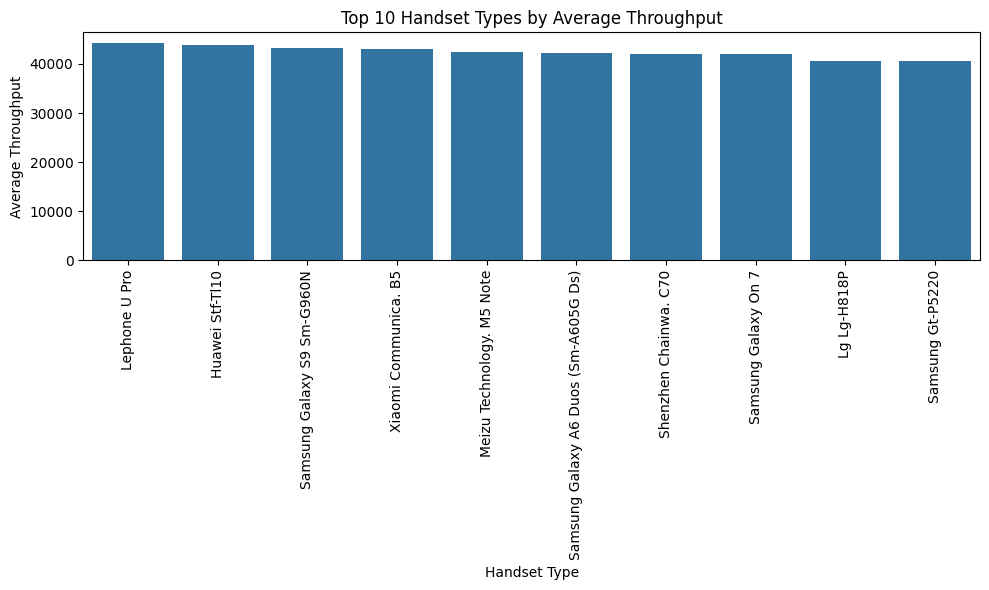

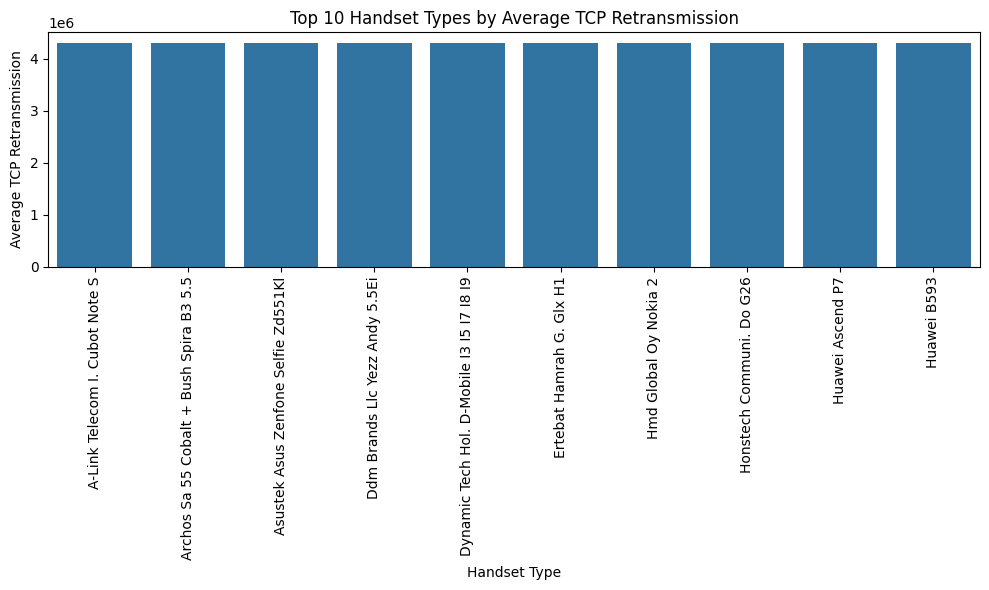

In [91]:
top_throughput_handset_types = aggregated_df.groupby('Handset Type')['avg_throughput'].mean().nlargest(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Handset Type', y='avg_throughput', data=top_throughput_handset_types)
plt.title('Top 10 Handset Types by Average Throughput')
plt.xlabel('Handset Type')
plt.ylabel('Average Throughput')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Top 10 Handset Types by average TCP retransmission
top_tcp_retransmission_handset_types = aggregated_df.groupby('Handset Type')['avg_tcp_retransmission'].mean().nlargest(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Handset Type', y='avg_tcp_retransmission', data=top_tcp_retransmission_handset_types)
plt.title('Top 10 Handset Types by Average TCP Retransmission')
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmission')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()